# ***Introduction to Radar Using Python and MATLAB***
## Andy Harrison - Artech House, 2020
<br/>

# Delay Line
***

Referring to Figure 4.2, the frequency response of a delay line canceller is given by (Equation 11.5)

\begin{equation}
    \left| H(f)\right|^2 = 4\,\sin^2\left( \pi f \right),
\end{equation}
***

Begin by getting the library path

In [1]:
import lib_path

Set up the normalized frequency space using the `linspace` routine from `scipy`

In [2]:
from scipy import linspace

frequency = linspace(0, 4, 1000)

Calculate the frequency response for a single delay line canceller using the `delay_line` routine from `countermeasures`

In [3]:
from Libs.ecm.countermeasures import delay_line 

response = delay_line(frequency) / 4.0

Import the `matplotlib` routines to display the frequency response of the single delay line canceller

In [4]:
from matplotlib import pyplot as plt

Import the `log10` and `finfo` routines for plotting the frequency response in deciBels

In [5]:
from scipy import log10, finfo

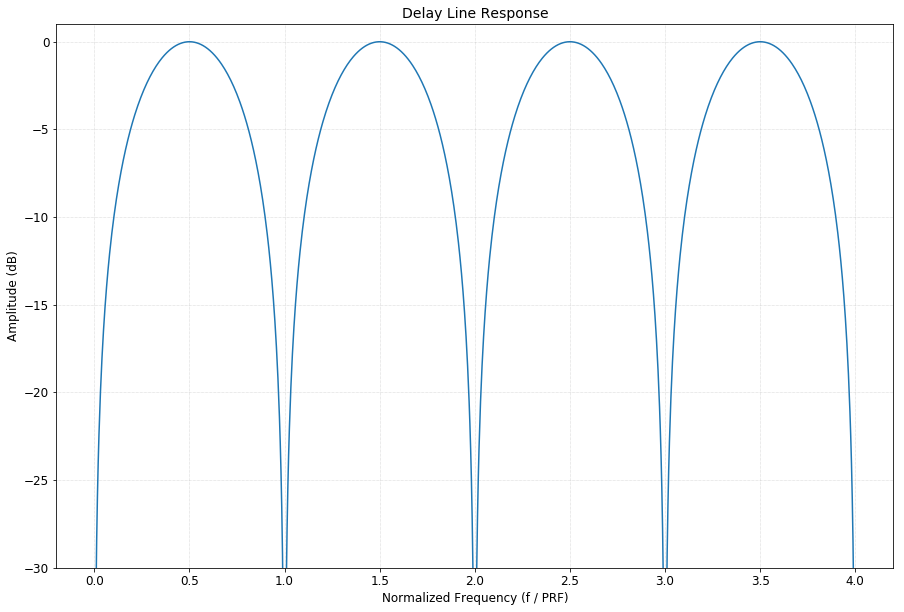

In [6]:
# Set the figure size

plt.rcParams["figure.figsize"] = (15, 10)


# Display the results

plt.plot(frequency, 10 * log10(response + finfo(float).eps), '')


# Set the plot title and labels

plt.title('Delay Line Response', size=14)

plt.xlabel('Normalized Frequency (f / PRF)', size=12)

plt.ylabel('Amplitude (dB)', size=12)


# Set the y-axis lim

plt.ylim([-30, 1])


# Turn on the grid

plt.grid(linestyle=':', linewidth=0.5)


# Set the tick label size

plt.tick_params(labelsize=12)

Set the pulse repetition stagger for a stagger type delay line canceller
     

In [7]:
prf_stagger = 5.0/4.0

        
Calculate the reponse for each PRF separately and then combine to get the final result

In [8]:
response_prf1 = delay_line(frequency) / 4.0

response_prf2 = delay_line(prf_stagger * frequency) / 4.0

response = 0.5 * (response_prf1 + response_prf2)

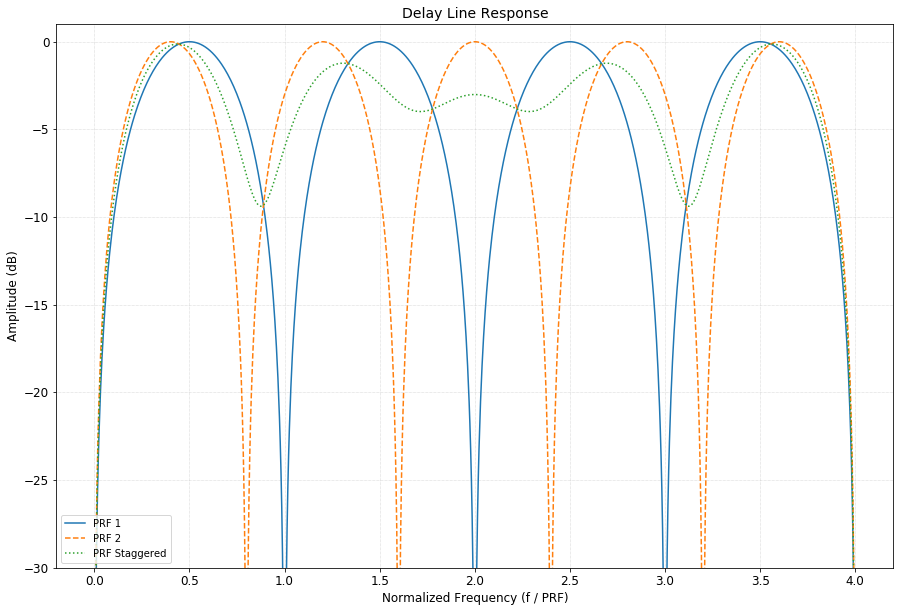

In [9]:
# Set the figure size

plt.rcParams["figure.figsize"] = (15, 10)


# Display the results

plt.plot(frequency, 10 * log10(response_prf1 + finfo(float).eps), '', label='PRF 1')

plt.plot(frequency, 10 * log10(response_prf2 + finfo(float).eps), '--', label='PRF 2')

plt.plot(frequency, 10 * log10(response + finfo(float).eps), ':', label='PRF Staggered')


# Place the legend

plt.legend(loc='lower left', prop={'size': 10})


# Set the plot title and labels

plt.title('Delay Line Response', size=14)

plt.xlabel('Normalized Frequency (f / PRF)', size=12)

plt.ylabel('Amplitude (dB)', size=12)


# Set the y-axis lim

plt.ylim([-30, 1])


# Turn on the grid

plt.grid(linestyle=':', linewidth=0.5)


# Set the tick label size

plt.tick_params(labelsize=12)